# PaisaBazaar Credit Score Predictor

## Project Summary:

* This project focuses on building a machine learning model to predict an individual's credit score category (Good, Poor, or Standard) using the Paisabazaar banking dataset. The dataset contains a variety of financial, behavioral, and demographic features such as: Occupation, Annual Income, Payment Behaviour, Outstanding Debt,etc.

### The end-to-end pipeline includes:

- Handling missing values using median and mode imputation

- Treating outliers using the IQR-based Winsorization method

- Encoding categorical variables using Label Encoding and One-Hot Encoding

- Standardizing numerical features using StandardScaler

- Encoding the target variable using LabelEncoder

- Splitting the data into training and testing sets

- Training and evaluating multiple classifiers

* Three classification models were built and evaluated: Random Forest, XGBoost, and Gradient Boosting. Among these, the Random Forest Classifier achieved the best overall performance with an accuracy of 80.6% and well-balanced F1-scores across all classes. It was selected as the final model due to its robustness, ability to handle class imbalance, and consistent performance across the credit score categories.

      --> This project demonstrates a complete credit scoring pipeline that can assist financial institutions in making informed credit approval decisions based on customer profiles.



In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Know Your Data

In [ ]:
# Load the dataset
df = pd.read_csv('dataset-2.csv')

In [3]:
data = df.copy()

In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
# shape of the dataset
data.shape

(100000, 28)

In [ ]:
# columns of the dataset
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# check for statistics
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
# Check for missing values
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
## Check for duplicates
data.duplicated().sum()

0

# Exploratory Data Analysis

## Chart - 1 

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\4283799215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=data, palette='Set2')


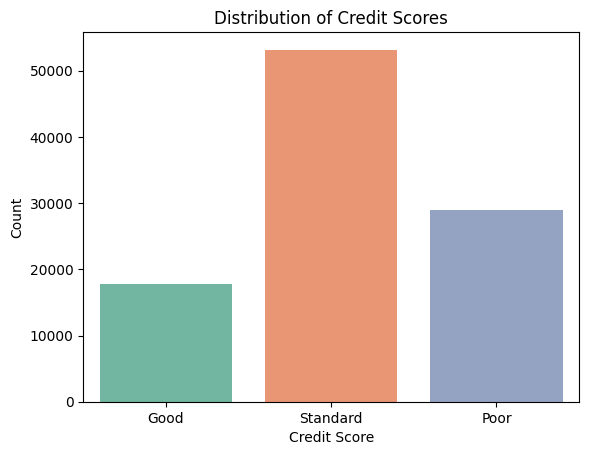

In [12]:
sns.countplot(x='Credit_Score', data=data, palette='Set2')
plt.title('Distribution of Credit Scores')  
plt.xlabel('Credit Score')
plt.ylabel('Count') 
plt.show()

### Insights:

* The bar chart "Distribution of Credit Scores" indicates that the majority of credit scores are "Standard," followed by "Poor," and then "Good."

## Chart - 2

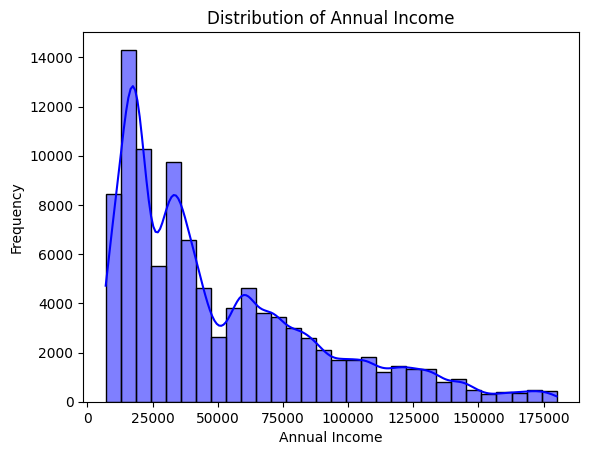

In [13]:
sns.histplot(data['Annual_Income'],bins=30, kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income') 
plt.ylabel('Frequency')
plt.show()

### Insights:

* The distribution of annual income is right-skewed.

* The highest frequencies of annual income are observed in the lower ranges, specifically around $15,000-$20,000 and then again around $30,000-$40,000.

* As annual income increases, the frequency of individuals earning those incomes significantly decreases.

* Very few individuals have an annual income exceeding $150,000.

## Chart - 3

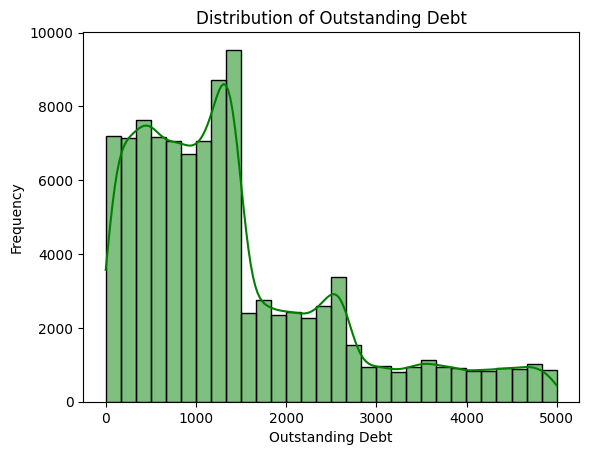

In [14]:
sns.histplot(data['Outstanding_Debt'], bins=30, kde=True, color='green')
plt.title('Distribution of Outstanding Debt')
plt.xlabel('Outstanding Debt')     
plt.ylabel('Frequency')
plt.show()

### Insights:

* The distribution of outstanding debt is multi-modal, with the highest frequency around $1200-1400. 

* There's another significant peak around $2500-2600. Generally, lower and very high debts are less frequent.

## Chart - 4

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\1670027780.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=data, palette='Set2')


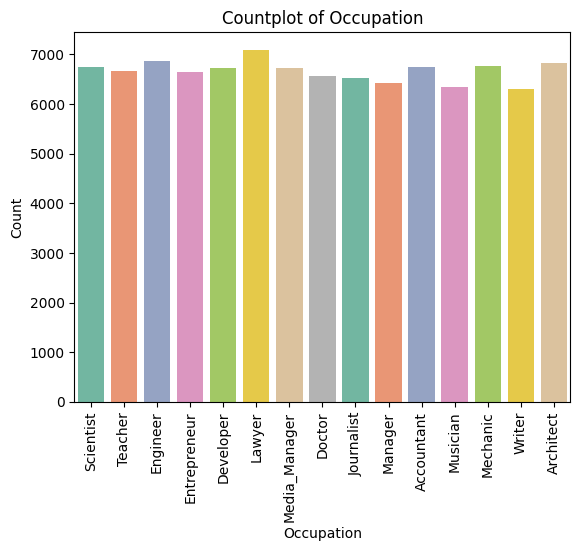

In [54]:
sns.countplot(x='Occupation', data=data, palette='Set2')
plt.title('Countplot of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count') 
plt.xticks(rotation='vertical')
plt.show()

### Insights:

* The distribution of occupations is relatively even, with Lawyers being slightly more frequent and Writers slightly less frequent than others, but no single occupation significantly dominates or is rare.

## Chart - 5

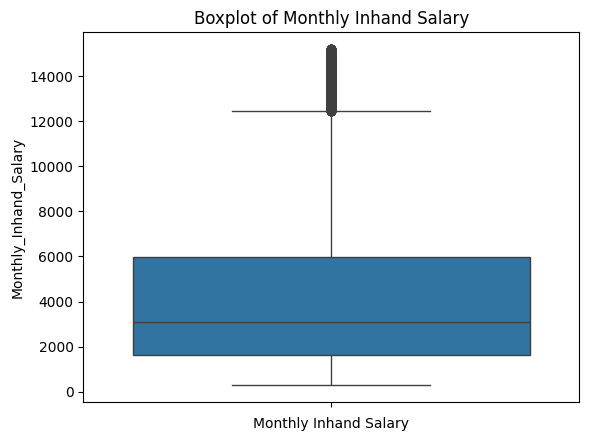

In [16]:
sns.boxplot(data['Monthly_Inhand_Salary'])
plt.title('Boxplot of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary') 
plt.show()


### Insights:

* The monthly in-hand salary has a median around \$3000, with most data between \$1800 and \$6000. 

* It's right-skewed with many high-earning outliers up to \$15,000.

## Chart - 6

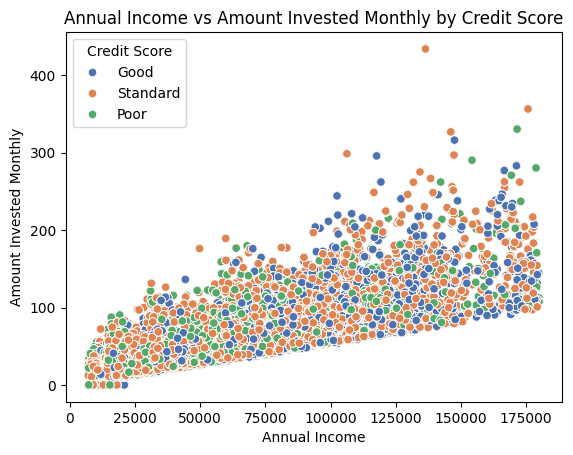

In [17]:
sns.scatterplot(x='Annual_Income',y='Amount_invested_monthly', data=data, hue='Credit_Score', palette='deep')
plt.title('Annual Income vs Amount Invested Monthly by Credit Score')
plt.xlabel('Annual Income') 
plt.ylabel('Amount Invested Monthly')
plt.legend(title='Credit Score')
plt.show()

### Insights:

* Monthly investment generally increases with annual income across all credit scores.

* All credit score groups show similar investment trends, with significant overlap.

* At higher incomes, "Good" credit scores tend to invest slightly more.

* Some "Poor" credit holders with high incomes invest significantly, even matching or exceeding others.

* Credit score doesn't dramatically alter the investment-income trend, but might affect investment magnitude.

## Chart - 7

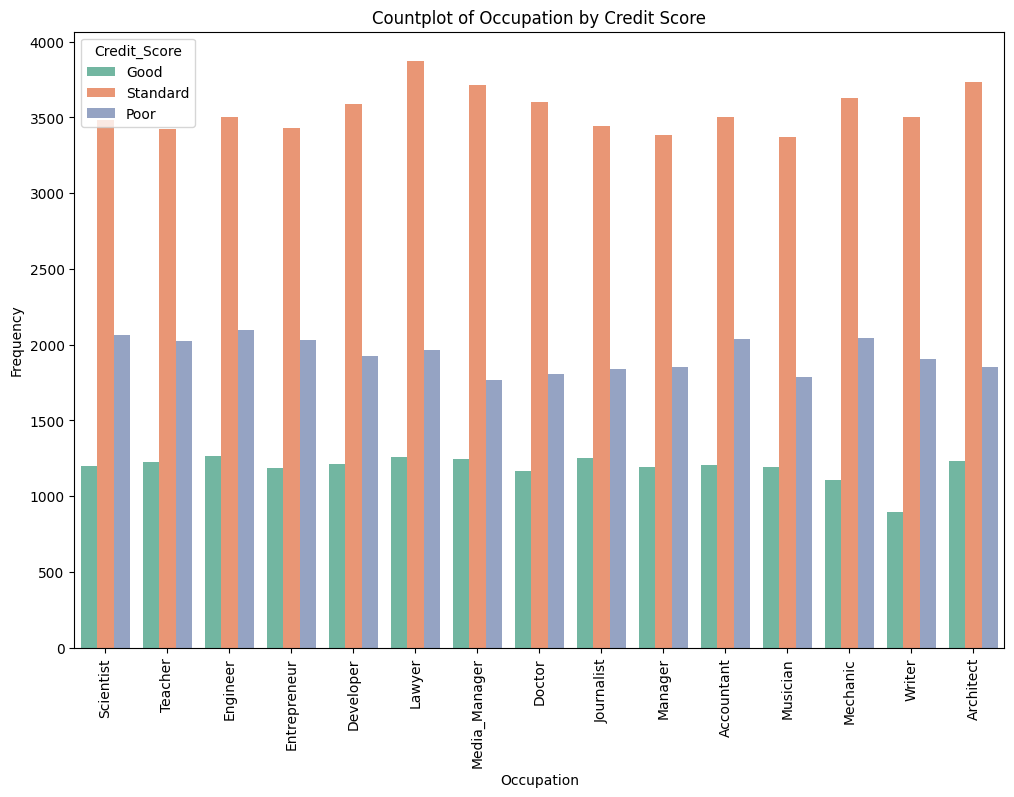

In [55]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation',hue='Credit_Score',data=data, palette='Set2')
plt.title('Countplot of Occupation by Credit Score')
plt.xlabel('Occupation')    
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Insights:

* The "Standard" credit score category has the highest frequency across all occupations.

* "Poor" credit scores generally have the second highest frequency for most occupations.

* "Good" credit scores consistently represent the smallest group across all listed occupations.

* This pattern of "Standard" > "Poor" > "Good" credit score frequency is remarkably consistent across every occupation shown.

* The chart primarily reveals the proportion of each credit score category within each occupation, showing "Standard" is the most common credit score overall, followed by "Poor," then "Good."

## Chart - 8

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\3445550135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score',y='Age', data=data, palette='Set2')


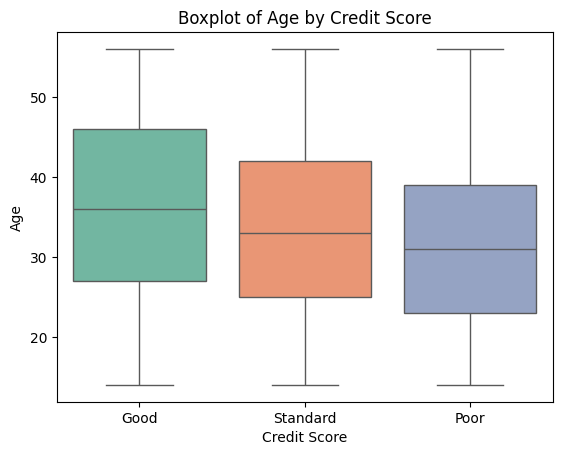

In [19]:
sns.boxplot(x='Credit_Score',y='Age', data=data, palette='Set2')
plt.title('Boxplot of Age by Credit Score')
plt.xlabel('Credit Score')  
plt.ylabel('Age')
plt.show()

### Insights:

* **"Good" Credit:** Higher median age (around 36-37) with a wider spread towards older ages.

* **"Standard" Credit:** Mid-range median age (around 33-34).

* **"Poor" Credit:** Lower median age (around 31), indicating a younger demographic.

* **Age-Credit Relationship:** A general trend suggests older individuals tend to have better credit, while younger individuals are more associated with poor credit.

* **Overall Age Presence:** All credit score categories include individuals across a wide age spectrum.

## Chart - 9

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\1599794383.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Score', y='Annual_Income', data=data, palette='deep')


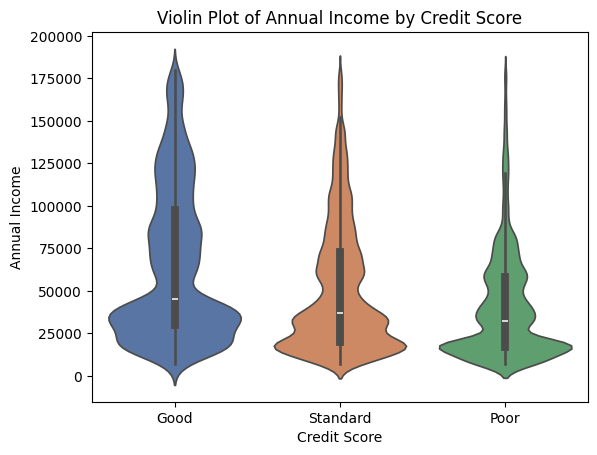

In [20]:
sns.violinplot(x='Credit_Score', y='Annual_Income', data=data, palette='deep')
plt.title('Violin Plot of Annual Income by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

### Insights:

* **"Good" Credit:** Highest and widest income range (up to $200k), with density at higher incomes.

* **"Standard" Credit:** Moderate income range, more concentrated at lower-to-mid levels.

* **"Poor" Credit:** Lowest income range, heavily concentrated at the lower end.

* **Income-Credit Correlation:** Higher income generally correlates with "Good" credit; lower income with "Poor" credit.

## Chart - 10

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\225242533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score',y='Num_Credit_Card', data=data, palette='Set2')


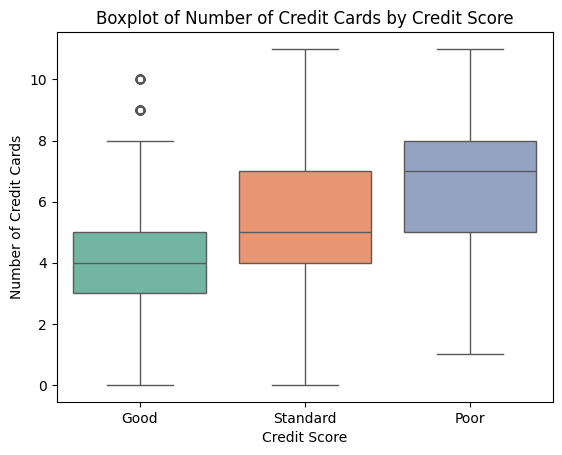

In [21]:
sns.boxplot(x='Credit_Score',y='Num_Credit_Card', data=data, palette='Set2')
plt.title('Boxplot of Number of Credit Cards by Credit Score')
plt.xlabel('Credit Score')  
plt.ylabel('Number of Credit Cards')
plt.show()

### Insights:

* **"Poor" Credit:** Highest number of credit cards (median ~7).

* **"Standard" Credit:** Moderate number of credit cards (median ~5).

* **"Good" Credit:** Fewest credit cards (median ~4), with few high outliers.

* **Inverse Relationship:** Better credit scores generally correlate with fewer credit cards.

## Chart - 11

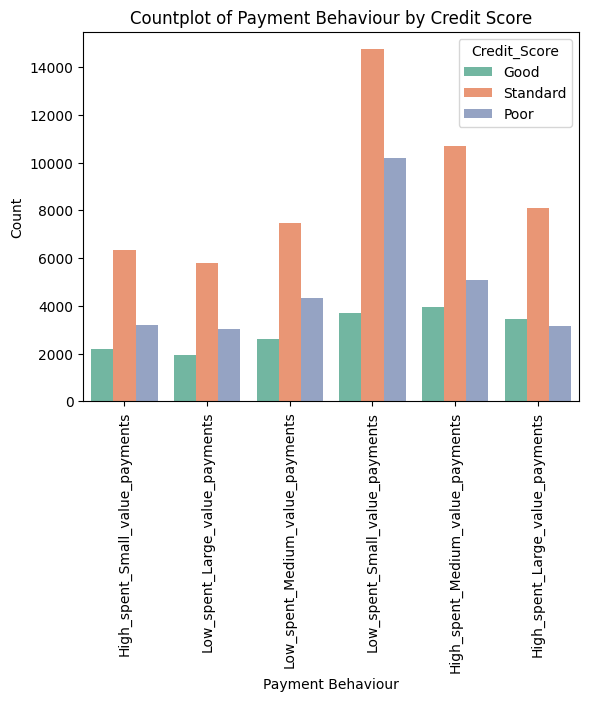

In [23]:
sns.countplot(x='Payment_Behaviour',hue='Credit_Score', data=data, palette='Set2')
plt.title('Countplot of Payment Behaviour by Credit Score')
plt.xlabel('Payment Behaviour')     
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

### Insights:

* **"Standard" Credit:** Most frequent across all payment behaviors, notably high for "Low_spent_Small_value_payments" and "High_spent_Medium_value_payments".

* **"Poor" Credit:** Generally the second most frequent for most payment behaviors, also prominent in "Low_spent_Small_value_payments."

* **"Good" Credit:** Consistently the least frequent credit score category across all payment behaviors.

* **Payment Behavior Trends:** "Low_spent_Small_value_payments" and "High_spent_Medium_value_payments" are the most common payment behaviors overall.

## Chart - 12

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\4168108174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=data, palette='Set2')


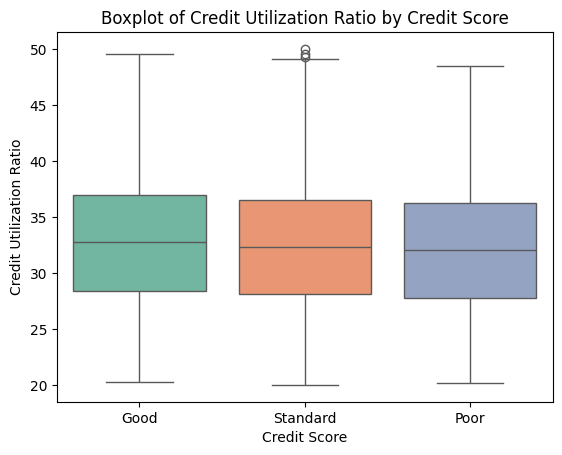

In [24]:
sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=data, palette='Set2')
plt.title('Boxplot of Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

### Insights:

* "Good" credit scores tend to have a slightly higher median credit utilization ratio (around 33%) compared to "Standard" and "Poor" (both around 32%).

* All three credit score categories show a similar range of utilization, mostly between 20% and 50%.

* There are some outliers for "Standard" credit, with utilization ratios close to 50%.

## Chart - 13

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_23676\2301008285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score',y='Total_EMI_per_month', data=data, palette='Set2')


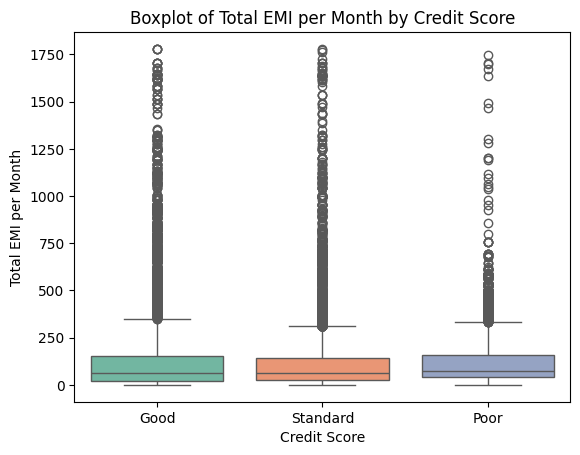

In [25]:
sns.boxplot(x='Credit_Score',y='Total_EMI_per_month', data=data, palette='Set2')
plt.title('Boxplot of Total EMI per Month by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Total EMI per Month')
plt.show()

### Insights:

* **Similar Medians:** Median EMI is roughly the same across all credit scores ($50-$100).

* **Widespread Outliers:** All credit scores have many high EMI outliers, some exceeding $1500.

* **Not a Differentiator:** Total EMI per month does not significantly distinguish between credit score categories.

# Preprocessing

In [26]:
## dropping unnecessary columns
data.drop(['ID','Customer_ID', 'Name', 'Month','SSN'], axis=1, inplace=True)

In [27]:
data.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
78434,43.0,Developer,43074.48,3315.540000,7.0,5.0,10.0,4.0,"Not Specified, Student Loan, Not Specified, an...",21.0,...,Standard,2572.44,35.915810,193.0,Yes,121.335252,53.052652,High_spent_Medium_value_payments,373.629699,Poor
23165,19.0,Journalist,15115.04,1274.586667,7.0,7.0,24.0,2.0,"Auto Loan, and Personal Loan",57.0,...,Standard,2154.52,34.516575,222.0,Yes,20.638839,32.694102,Low_spent_Small_value_payments,282.639388,Poor
5895,43.0,Media_Manager,99902.37,8249.197500,3.0,6.0,1.0,2.0,"Student Loan, and Credit-Builder Loan",5.0,...,Good,446.72,36.853686,194.0,No,97.366122,98.563887,High_spent_Large_value_payments,821.597824,Standard
24549,46.0,Engineer,29873.96,2477.496667,5.0,4.0,10.0,0.0,No Data,29.0,...,Good,1117.08,28.439966,316.0,No,0.000000,68.579130,High_spent_Small_value_payments,369.384111,Poor
6351,36.0,Media_Manager,16192.10,1284.341667,9.0,9.0,30.0,9.0,"Mortgage Loan, Not Specified, Personal Loan, M...",55.0,...,Bad,1860.55,23.332547,99.0,Yes,64.658009,32.014363,Low_spent_Small_value_payments,304.459435,Poor


### Handling outliers:

* **winsorization**

1. Identify a threshold: You typically define a percentile (e.g., the 25th percentile and the 75th percentile) for both the lower and upper tails of your data.

2. Cap the extremes:

* Any data points below the lower threshold (e.g., below the 25th percentile) are replaced by the value at that lower threshold.

* Any data points above the upper threshold (e.g., above the 75th percentile) are replaced by the value at that upper threshold.

In [28]:
import pandas as pd

def winsorize_data(data, exclude_cols=[]):
    data_winsorized = data.copy()
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    summary = []

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Save original outlier count
        original_outliers = ((data[col] < lower) | (data[col] > upper)).sum()

        # Clip values
        data_winsorized[col] = data[col].clip(lower, upper)

        summary.append({
            'Column': col,
            'Outliers Capped': original_outliers,
            'Lower Bound': round(lower, 2),
            'Upper Bound': round(upper, 2)
        })

    summary_data = pd.DataFrame(summary)
    return data_winsorized, summary_data


In [ ]:
# exclude target column
data_winsorized, cap_summary = winsorize_data(data, exclude_cols=['Credit_Score'])

# View the summary
print(cap_summary.sort_values(by='Outliers Capped', ascending=False))

                      Column  Outliers Capped  Lower Bound  Upper Bound
16           Monthly_Balance             7400       -25.78       756.62
11          Outstanding_Debt             5272     -1503.76      4015.80
14       Total_EMI_per_month             5044      -147.92       324.58
15   Amount_invested_monthly             4464       -37.05       136.30
7        Delay_from_due_date             4002       -17.00        55.00
2      Monthly_Inhand_Salary             2017     -4870.09     12454.40
1              Annual_Income             2000    -59167.77    150194.22
10      Num_Credit_Inquiries              787        -4.50        15.50
9       Changed_Credit_Limit              579        -8.82        29.06
12  Credit_Utilization_Ratio                4        15.39        49.16
13        Credit_History_Age                0       -93.00       539.00
0                        Age                0        -3.00        69.00
6                Num_of_Loan                0        -2.50      

### Visualizing the data before and after handling outliers

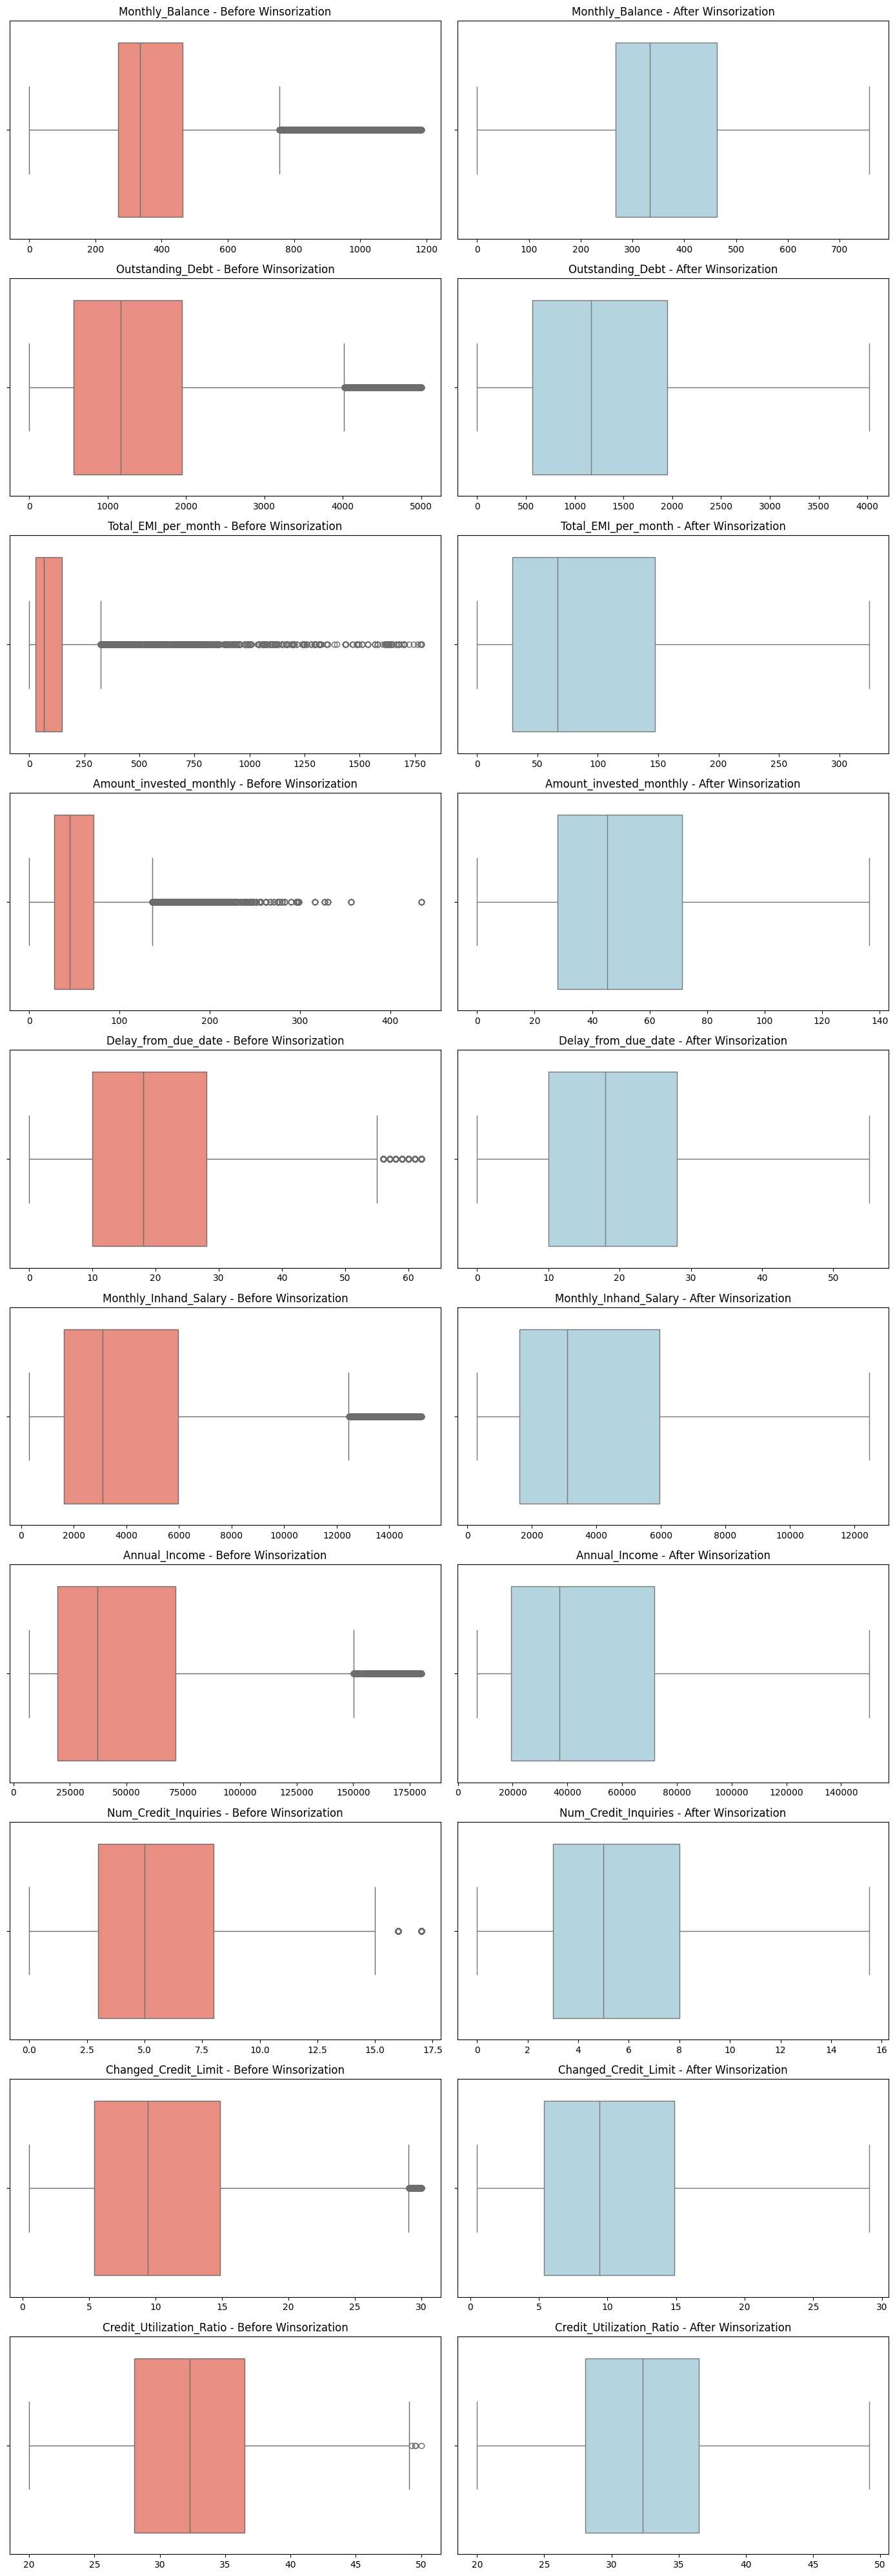

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you applied winsorization on
columns_with_outliers = [
    'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Delay_from_due_date', 'Monthly_Inhand_Salary',
    'Annual_Income', 'Num_Credit_Inquiries', 'Changed_Credit_Limit',
    'Credit_Utilization_Ratio'
]

# Create subplots: 2 plots (before/after) per column
fig, axes = plt.subplots(len(columns_with_outliers), 2, figsize=(14, 4 * len(columns_with_outliers)))

for i, col in enumerate(columns_with_outliers):
    sns.boxplot(x=data[col], ax=axes[i, 0], color='salmon')
    axes[i, 0].set_title(f"{col} - Before Winsorization")
    axes[i, 0].set_xlabel("")

    sns.boxplot(x=data_winsorized[col], ax=axes[i, 1], color='lightblue')
    axes[i, 1].set_title(f"{col} - After Winsorization")
    axes[i, 1].set_xlabel("")

plt.tight_layout()
plt.show()


In [ ]:
# Check for duplicates again after winsorization
data.duplicated().sum()

0

In [ ]:
# Check for missing values after winsorization
data.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Preprocessing pipeline

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [34]:
# Split features and target
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# Identify column types
num_features = X.select_dtypes(include='number').columns.tolist()
cat_features = X.select_dtypes(exclude='number').columns.tolist()

# Define Pipelines for preprocessing
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num_features', num_pipeline, num_features),
    ('cat_features', cat_pipeline, cat_features)
])

In [35]:
## label encoding the target variable
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

In [ ]:
## splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Model Building and Evaluation

## Model - 1

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_processed, y_train)

y_pred = rfc.predict(X_test_processed)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('='*60)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('='*60)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lb.classes_))

Confusion Matrix:
[[2640    7  880]
 [  28 4809 1037]
 [ 740 1173 8686]]
Accuracy Score: 0.80675
Classification Report:
              precision    recall  f1-score   support

        Good       0.77      0.75      0.76      3527
        Poor       0.80      0.82      0.81      5874
    Standard       0.82      0.82      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



## Model - 2

In [45]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_processed, y_train)

y_pred = xgb_model.predict(X_test_processed)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('='*60)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('='*60)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lb.classes_))


Confusion Matrix:
[[2582   52  893]
 [ 321 4066 1487]
 [1189 1256 8154]]
Accuracy Score: 0.7401
Classification Report:
              precision    recall  f1-score   support

        Good       0.63      0.73      0.68      3527
        Poor       0.76      0.69      0.72      5874
    Standard       0.77      0.77      0.77     10599

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.74      0.74      0.74     20000



## Model - 3

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train_processed, y_train)
y_pred = gbc.predict(X_test_processed)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('='*60)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('='*60)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lb.classes_))

Confusion Matrix:
[[2573   36  918]
 [ 450 3726 1698]
 [1435 1223 7941]]
Accuracy Score: 0.712
Classification Report:
              precision    recall  f1-score   support

        Good       0.58      0.73      0.64      3527
        Poor       0.75      0.63      0.69      5874
    Standard       0.75      0.75      0.75     10599

    accuracy                           0.71     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.72      0.71      0.71     20000



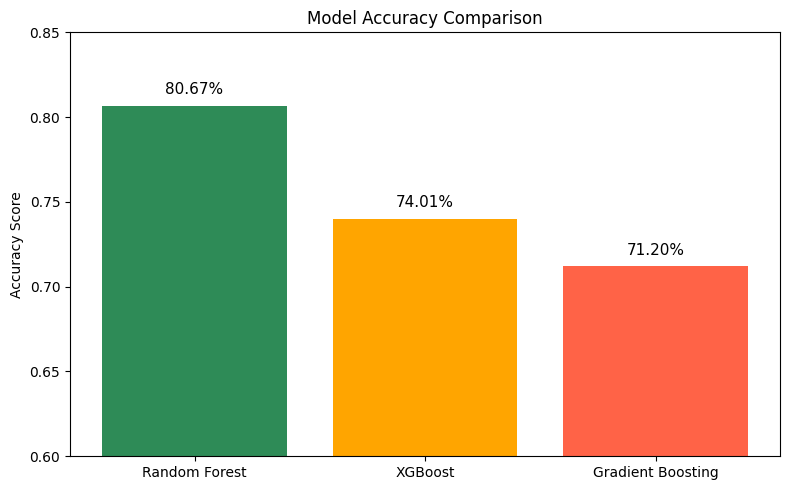

In [51]:
import matplotlib.pyplot as plt

# Model names and accuracy values
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting']
accuracies = [0.80675, 0.7401, 0.712]

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['seagreen', 'orange', 'tomato'])
plt.ylim(0.6, 0.85)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')

# Add text annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2%}", 
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


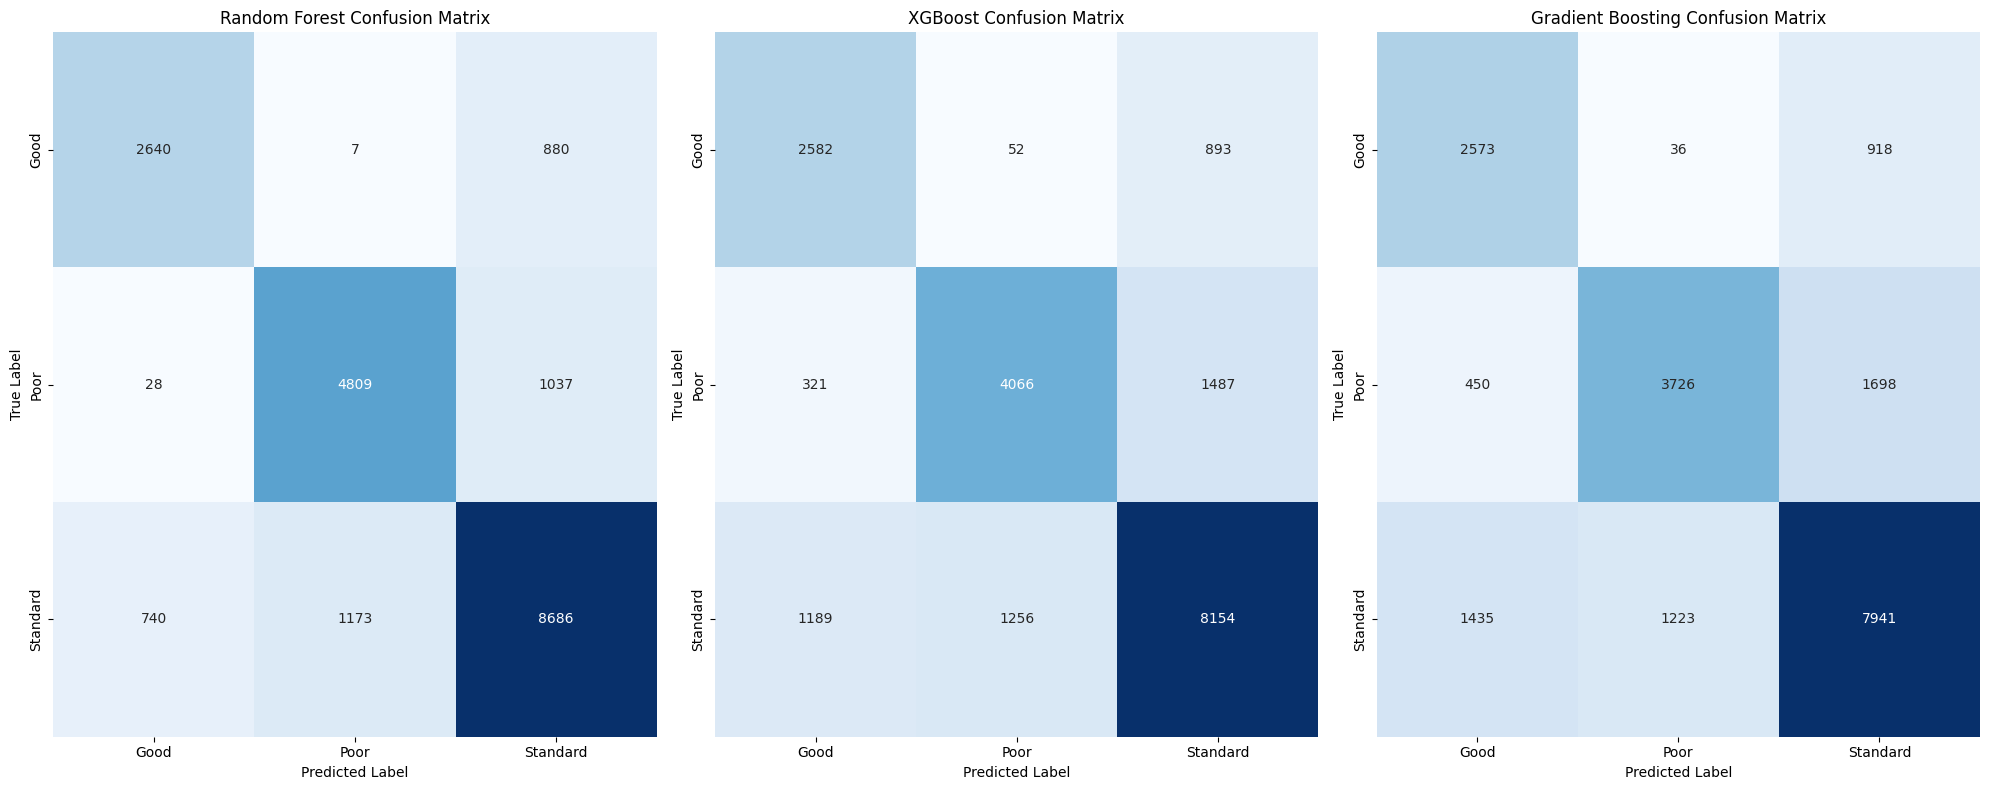

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrices from your model results
cm_rf = np.array([[2640, 7, 880],
                  [28, 4809, 1037],
                  [740, 1173, 8686]])

cm_xgb = np.array([[2582, 52, 893],
                   [321, 4066, 1487],
                   [1189, 1256, 8154]])

cm_gb = np.array([[2573, 36, 918],
                  [450, 3726, 1698],
                  [1435, 1223, 7941]])

# Store matrices in a dictionary for easy access
models = {
    'Random Forest': cm_rf,
    'XGBoost': cm_xgb,
    'Gradient Boosting': cm_gb
}

# Plot all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for ax, (model_name, cm) in zip(axes, models.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['Good', 'Poor', 'Standard'],
                yticklabels=['Good', 'Poor', 'Standard'])
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()


### Insights:

* Random Forest shows strong and balanced predictions, especially for the "Standard" and "Poor" classes.

* XGBoost slightly struggles with the "Good" and "Poor" classes compared to Random Forest.

* Gradient Boosting misclassifies more samples, especially from the "Good" class, leading to reduced overall accuracy.

    --> Best model came out to be Random Forest Classifier

### saving the model and preprocessing pipeline

In [49]:
import joblib

# Save the trained model
joblib.dump(rfc, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [50]:
# Save the preprocessing pipeline
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')

# Later, load it with:
# preprocessor = joblib.load('preprocessing_pipeline.pkl')


['preprocessing_pipeline.pkl']

# Conclusion:

* Among the models tested, the Random Forest Classifier delivered the best overall performance, achieving an accuracy of 80.6% and balanced F1-scores across all three credit score categories (Good, Poor, Standard). 

* It effectively handled class imbalance using class_weight='balanced', making it a robust and reliable choice for this classification problem.

## Final Model:

* **Chosen Model:** RandomForestClassifier(class_weight='balanced')

* **Reason:** Best accuracy, stable across imbalanced classes, and easy to interpret